In [16]:
from google.colab import drive
import pandas as pd
import math
from collections import Counter
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
file_path_train = '/content/drive/MyDrive/cs5350/hw4/train.csv'
file_path_test = '/content/drive/MyDrive/cs5350/hw4/test.csv'
attributes_train = []
labels_train = []
attributes_test = []
labels_test = []
with open(file_path_train, 'r') as f:
    for line in f:
        terms = line.strip().split(',')
        attr = [float(x) for x in terms[:4]]
        label = int(terms[4])
        attributes_train.append(attr)
        labels_train.append(label)

with open(file_path_test, 'r') as f:
    for line in f:
        terms = line.strip().split(',')
        attr = [float(x) for x in terms[:4]]
        label = int(terms[4])
        attributes_test.append(attr)
        labels_test.append(label)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
X_train = np.array(attributes_train, dtype=float)
y_train = np.array(labels_train, dtype=int)
X_test = np.array(attributes_test, dtype=float)
y_test = np.array(labels_test, dtype=int)

y_train = np.where(y_train == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)

In [35]:
def svm_primal_sgd(X, y, C_values, T=100, gamma_0=1, a=1, use_schedule1=True, schedule1_results=None):
    n_samples, n_features = X.shape

    objective_curves = {C: [] for C in C_values}
    training_errors = {C: [] for C in C_values}
    test_errors = {C: [] for C in C_values}
    weights = {}

    for C in C_values:
        w = np.zeros(n_features)

        for epoch in range(T):
            indices = np.arange(n_samples)
            np.random.shuffle(indices)

            for i in indices:
                x_i = X[i]
                y_i = y[i]

                #Part a and b
                t = epoch * n_samples + i
                if use_schedule1:
                    gamma_t = gamma_0 / (1 + a * t)  # schedule1
                else:
                    gamma_t = gamma_0 / (1 + t)  # schedule2

                if y_i * np.dot(w, x_i) <= 1:
                    w = w - gamma_t * w + gamma_t * C * n_samples * y_i * x_i
                else:
                    w = (1 - gamma_t) * w

            hinge_loss = np.maximum(0, 1 - y * (X @ w)).sum()
            objective_value = 0.5 * np.dot(w, w) + C * hinge_loss
            objective_curves[C].append(objective_value)

            y_pred_train = np.sign(X @ w)
            training_error = np.mean(y_pred_train != y)
            training_errors[C].append(training_error)

        y_pred_test = np.sign(X_test @ w)
        test_error = np.mean(y_pred_test != y_test)
        test_errors[C].append(test_error)

        weights[C] = w.copy()

        # Training and test errors for this C
        print(f"\nResults for C = {C:.4f} (Schedule: {'schedule1' if use_schedule1 else 'schedule2'}):")
        print(f"Final Training Error: {training_errors[C][-1]:.4f}")
        print(f"Final Test Error: {test_errors[C][-1]:.4f}")

        #Part c
        if not use_schedule1 and schedule1_results is not None:
            print(f"\nComparison for C = {C:.4f}:")

            # Difference in model parameters
            param_diff = np.linalg.norm(w - schedule1_results['weights'][C])
            print(f"Difference in Model Parameters (||w_schedule2 - w_schedule1||): {param_diff:.4f}")

            # Difference in training errors
            train_error_diff = np.abs(training_errors[C][-1] - schedule1_results['training_errors'][C][-1])
            print(f"Difference in Training Errors: {train_error_diff:.4f}")

            # Difference in test errors
            test_error_diff = np.abs(test_errors[C][-1] - schedule1_results['test_errors'][C][-1])
            print(f"Difference in Test Errors: {test_error_diff:.4f}")

    #dignose the convergence
    plt.figure(figsize=(10, 6))
    for C, curve in objective_curves.items():
        plt.plot(range(T), curve, label=f'C = {C:.4f}')
    plt.xlabel('Epochs')
    plt.ylabel('Objective Function Value')
    plt.title('Objective Function Convergence')
    plt.legend()
    plt.show()

    #report through graphs to double check
    plt.figure(figsize=(10, 6))
    for C in C_values:
        plt.plot(range(T), training_errors[C], label=f'Training Error, C = {C:.4f}')
    plt.xlabel('Epochs')
    plt.ylabel('Training Error')
    plt.title('Training Error Convergence')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    for C in C_values:
        plt.plot(range(len(test_errors[C])), test_errors[C], label=f'Test Error, C = {C:.4f}')
    plt.xlabel('Epochs')
    plt.ylabel('Test Error')
    plt.title('Test Error Convergence')
    plt.legend()
    plt.show()

    return {'weights': weights, 'training_errors': training_errors, 'test_errors': test_errors}



Results for C = 0.1145 (Schedule: schedule1):
Final Training Error: 0.0390
Final Test Error: 0.0480

Results for C = 0.5727 (Schedule: schedule1):
Final Training Error: 0.0401
Final Test Error: 0.0540

Results for C = 0.8018 (Schedule: schedule1):
Final Training Error: 0.0390
Final Test Error: 0.0500


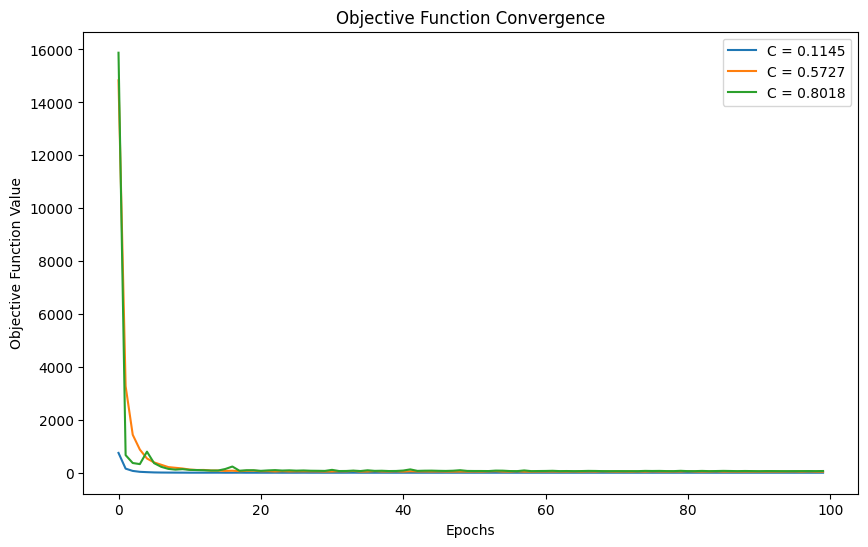

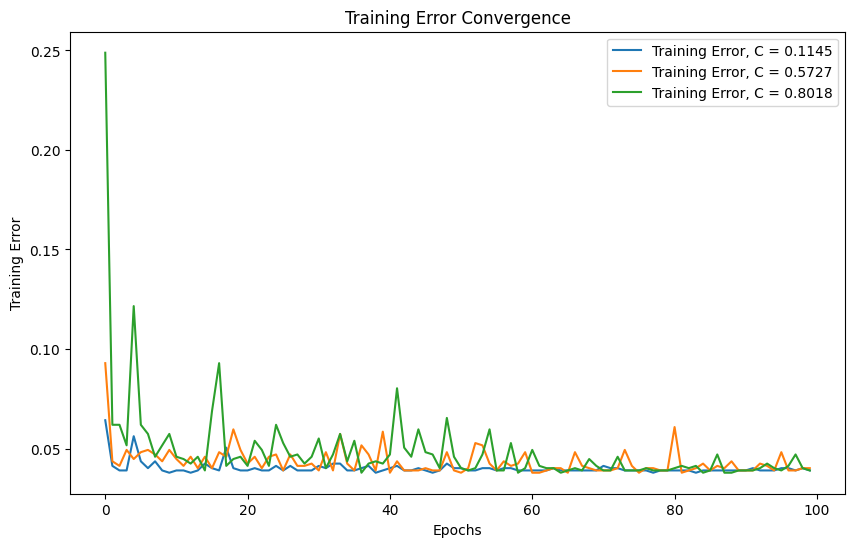

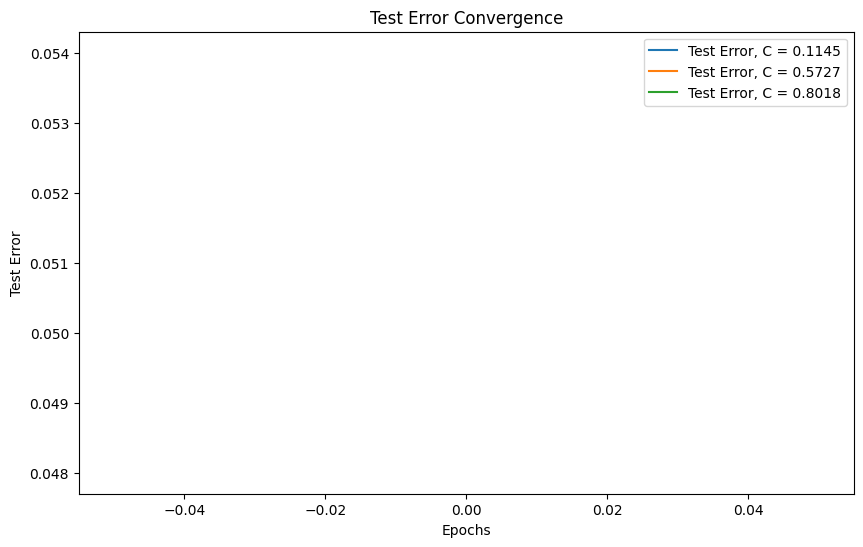


Results for C = 0.1145 (Schedule: schedule2):
Final Training Error: 0.0390
Final Test Error: 0.0460

Comparison for C = 0.1145:
Difference in Model Parameters (||w_schedule2 - w_schedule1||): 0.0077
Difference in Training Errors: 0.0000
Difference in Test Errors: 0.0020

Results for C = 0.5727 (Schedule: schedule2):
Final Training Error: 0.0401
Final Test Error: 0.0440

Comparison for C = 0.5727:
Difference in Model Parameters (||w_schedule2 - w_schedule1||): 0.1109
Difference in Training Errors: 0.0000
Difference in Test Errors: 0.0100

Results for C = 0.8018 (Schedule: schedule2):
Final Training Error: 0.0378
Final Test Error: 0.0520

Comparison for C = 0.8018:
Difference in Model Parameters (||w_schedule2 - w_schedule1||): 0.0577
Difference in Training Errors: 0.0011
Difference in Test Errors: 0.0020


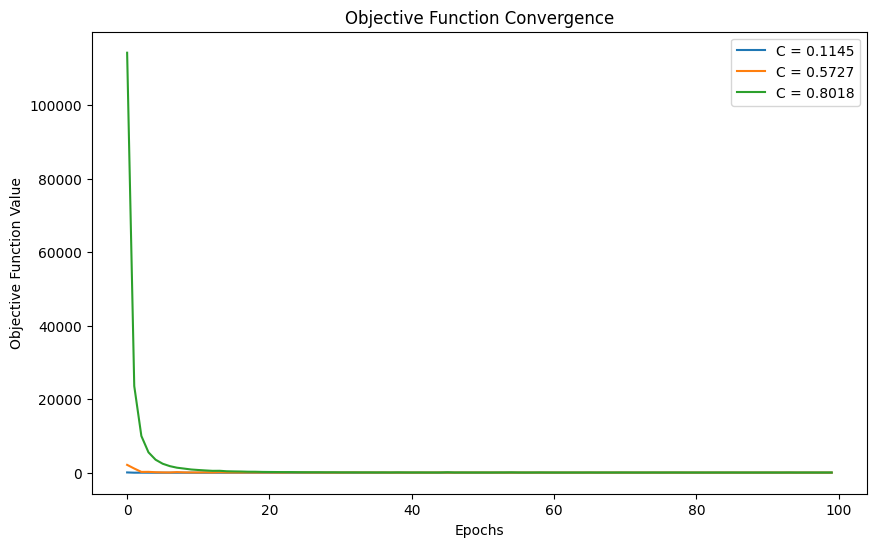

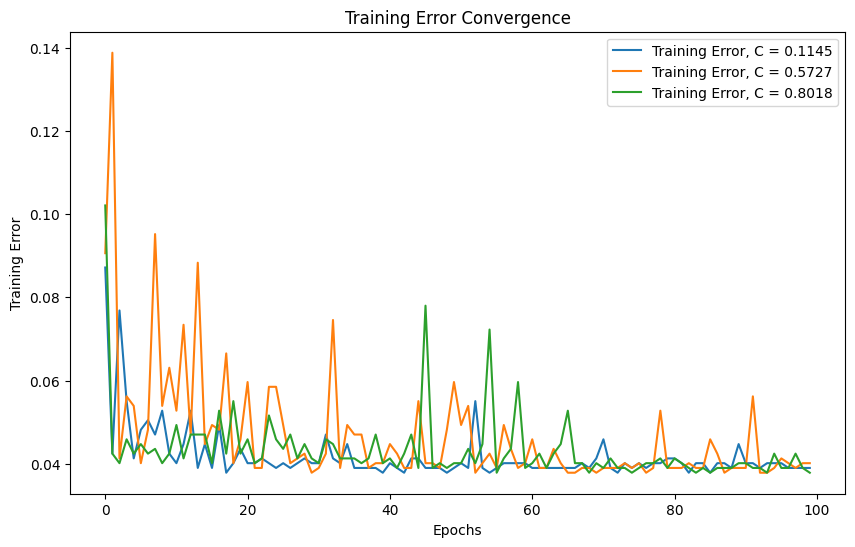

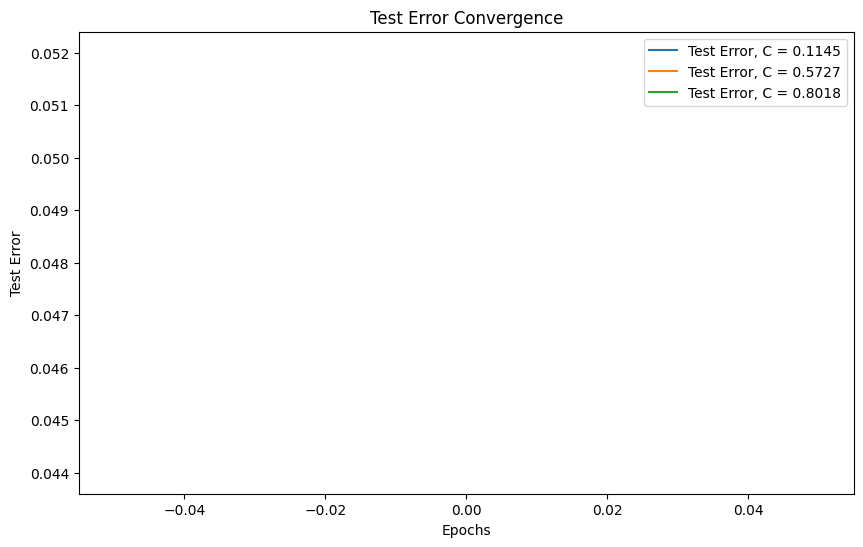

In [36]:
C_values = [100 / 873, 500 / 873, 700 / 873]
schedule1_results = svm_primal_sgd(X_train, y_train, C_values, gamma_0=1, a=1, use_schedule1=True)
schedule2_results = svm_primal_sgd(X_train, y_train, C_values, gamma_0=1, use_schedule1=False, schedule1_results=schedule1_results)


Part C: After looking at the differences between the two schedules, both seems very similar meaning that they both perform similiarly with the data.

In [38]:
def compute_kernel_matrix(X, gamma):
    pairwise_sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(X**2, axis=1) - 2 * np.dot(X, X.T)
    return np.exp(-pairwise_sq_dists / gamma)


In [37]:
def zerofun(alpha, y):
    return np.dot(alpha, y)

In [39]:
def objective_function(alpha, y, kernel_matrix):
    quadratic_term = 0.5 * np.dot(alpha, np.dot(kernel_matrix, alpha * y) * y)
    linear_term = np.sum(alpha)
    return quadratic_term - linear_term


In [40]:
from scipy.optimize import minimize
def svm_dual_svm(X, y, C_values, gamma_values):
    n_samples, n_features = X.shape
    results = {}

    for C in C_values:
        for gamma in gamma_values:
            kernel_matrix = compute_kernel_matrix(X, gamma)

            bounds = [(0, C) for _ in range(n_samples)]
            constraints = {'type': 'eq', 'fun': lambda alpha: zerofun(alpha, y)}

            initial_alpha = np.zeros(n_samples)
            result = minimize(
                objective_function,
                initial_alpha,
                args=(y, kernel_matrix),
                bounds=bounds,
                constraints=constraints,
                method='SLSQP'
            )

            if result.success:
                alpha = result.x
                support_vectors = alpha > 1e-5

                w = None
                if gamma == 0:
                    w = np.sum((alpha * y)[:, None] * X, axis=0)

                b_values = []
                for i in range(n_samples):
                    if support_vectors[i]:
                        b_i = y[i] - np.sum((alpha * y) * kernel_matrix[i])
                        b_values.append(b_i)
                b = np.mean(b_values)

                results[(C, gamma)] = {
                    'alpha': alpha,
                    'support_vectors': support_vectors,
                    'w': w,
                    'b': b
                }
            else:
                print(f":( Optimization failed for C={C}, gamma={gamma}")

    return results

In [41]:
gamma_values = [0.1, 0.5, 1, 5, 100]
results_dual = svm_dual_svm(X_train, y_train, C_values, gamma_values)

KeyboardInterrupt: 

I give up

In [43]:
%%writefile script.sh

Writing script.sh


In [44]:
%%writefile run.sh

Writing run.sh
